In [461]:
'''
4rd_ML100
期中Kaggle競賽
最佳得分0.82142
最佳排名24/66
'''

'\n4rd_ML100\n期中Kaggle競賽\n最佳得分0.82142\n最佳排名24/66\n'

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [463]:
# 設定 data_path
dir_data = '/home/osboxes/Documents/Day_050_Kaggle/'
f_app_train = os.path.join(dir_data, 'train_data.csv')
f_app_test = os.path.join(dir_data, 'test_features.csv')

# 讀取檔案
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)
criminal = app_train[app_train["poi"] == True]
suspects = app_train[app_train["poi"] == False]

In [410]:
# 將test set的name存進submit,供未來上傳kaggle用
submit = app_test[['name']]

In [464]:
# 呼叫labelencoder and minmax
le = LabelEncoder()
MMEncoder = MinMaxScaler()

In [465]:
# check train set columns
print(app_train.columns)

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')


In [466]:
# creat list, 跟錢有關的->money, 跟錢有關且大部分均為正值->pos, 大部分為負值->nag, 跟信件有關的->mail
money = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'total_stock_value', "stock_mup", "stock_add", "money"]
pos = ['salary', 'bonus', 'deferral_payments', 'director_fees', 'exercised_stock_options', 'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'loan_advances', 'total_stock_value', 'total_payments']
nag = ['deferred_income', 'restricted_stock_deferred']

mail =  ['name', 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'poi_messages_add', 'poi_messages_mup', 'poi_messages_div', 'poi_messages_min','weight_poi_message']#, 'weight_poi_message']'equl_recipe', 'equl_poi_message'],'poi_messages_add', 'poi_messages_mup', 'poi_messages_div', 'poi_messages_min']

In [467]:
# 將測試集與訓練集分別存入df中, 未來要調整參數較方便使用
df_train = app_train
df_test = app_test
print(df_train.columns)
print(df_test.columns)

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')


In [468]:
'''
以下均為嘗試新增的特徵值,但這些新增的特徵值最高僅能得到0.75分左右的分數,需要在多加嘗試或調整才有機會更佳
'''
# app_train["stock_div"] = app_train["exercised_stock_options"] / app_train["total_stock_value"]
# app_train["stock_mup"] = app_train["exercised_stock_options"] * app_train["total_stock_value"]
# app_train["stock_min"] = app_train["total_stock_value"] - app_train["exercised_stock_options"]
# app_train["stock_add"] = app_train["total_stock_value"] + app_train["exercised_stock_options"]
# app_train["money"] = app_train["total_stock_value"] + app_train["salary"]+app_train["bonus"]
# app_train["poi_messages_add"] = app_train["from_poi_to_this_person"] + app_train["from_this_person_to_poi"]
# app_train["poi_messages_mup"] = app_train["from_poi_to_this_person"] * app_train["from_this_person_to_poi"]
# app_train["poi_messages_div"] = app_train["from_poi_to_this_person"] / app_train["from_this_person_to_poi"]
# app_train["poi_messages_min"] = app_train["from_poi_to_this_person"] - app_train["from_this_person_to_poi"]
# if (app_train["from_poi_to_this_person"]) != 0:
# df_train["equl_recipe"] = app_train["shared_receipt_with_poi"] / (app_train["from_poi_to_this_person"] + app_train["from_this_person_to_poi"])
# df_train["equl_recipe"][df_train["equl_recipe"] > 999999] = 0
# df_train["equl_poi_message"] = (app_train["from_poi_to_this_person"] + app_train["from_this_person_to_poi"]) / (app_train["to_messages"]+app_train["from_messages"])
# df_train["weight_poi_message"] = df_train["weight_poi_message"]
# for weitght, num in zip(df_train["weight_poi_message"], range(len(df_train))):
#     df_train.loc[num, "weight_poi_message"] = math.exp(weitght)

# 針對測試集進行特徵工程
df_train["weight_poi_message"] = app_train["shared_receipt_with_poi"] * (app_train["from_poi_to_this_person"] + app_train["from_this_person_to_poi"]) / (app_train["to_messages"]+app_train["from_messages"])
app_train["poi_messages_add"] = app_train["from_poi_to_this_person"] + app_train["from_this_person_to_poi"]
app_train["poi_messages_mup"] = app_train["from_poi_to_this_person"] * app_train["from_this_person_to_poi"]
app_train["poi_messages_div"] = app_train["from_poi_to_this_person"] / app_train["from_this_person_to_poi"]
app_train["poi_messages_min"] = app_train["from_poi_to_this_person"] - app_train["from_this_person_to_poi"]
app_train["poi_messages_div"][app_train["poi_messages_div"] > 99999] = 99999
for dtype, feature in zip(app_train.dtypes, mail):
    
    if feature == "email_address":
        df_train[feature] = app_train[feature].fillna("NAN")
        df_train[feature] = le.fit_transform(df_train[feature])
    if feature == "name":
        df_train[feature] = le.fit_transform(app_train[feature])
    else:
        df_train[feature] = app_train[feature].fillna(-999)
        df_train[feature] = le.fit_transform(app_train[feature])
    
for dtype, feature in zip(app_train.dtypes, money):
    if dtype != "object":
        if feature == "restricted_stock_deferred":
            df_train[feature] = app_train[feature].fillna(0)
        if feature == "exercised_stock_options":
            df_train[feature] = app_train[feature].fillna(0)
        if feature == "restricted_stock":
            df_train[feature] = app_train[feature].fillna(0)
        if feature == "restricted_stock_deferred":
            df_train[feature] = app_train[feature].fillna(99999)
for dtype, feature in zip(app_train.dtypes, pos): #因為大部分均為正值,因此對缺失值補負的
    df_train[feature] = app_train[feature].fillna(-999)
for dtype, feature in zip(app_train.dtypes, nag): #因為大部分均為負值,因此對缺失值補正的
    df_train[feature] = app_train[feature].fillna(999)

app_train["stock_mup"] = app_train["exercised_stock_options"] * app_train["total_stock_value"]
app_train["stock_add"] = app_train["total_stock_value"] + app_train["exercised_stock_options"]
app_train["money"] = app_train["total_stock_value"] + app_train["salary"]+app_train["bonus"]
df_train = df_train.drop(["restricted_stock_deferred", "director_fees", "loan_advances"], axis=1)
print(df_train)

     name      bonus  deferral_payments  deferred_income  email_address  \
0      84  1750000.0             -999.0       -3504386.0             42   
1      92  5600000.0             -999.0            999.0             29   
2      91   200000.0             -999.0          -4167.0             62   
3      58   800000.0             -999.0            999.0             55   
4      15  1250000.0             -999.0        -262500.0             10   
..    ...        ...                ...              ...            ...   
108    93   500000.0             -999.0            999.0             19   
109    11     -999.0             -999.0            999.0             54   
110    80   300000.0             -999.0            999.0             51   
111    44     -999.0             -999.0            999.0             15   
112    89   650000.0             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0    

/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [469]:
# 同訓練集的想法, 此處為測試集的特徵工程

# app_test["stock_div"] = app_test["exercised_stock_options"] / app_test["total_stock_value"]
# app_test["stock_mup"] = app_test["exercised_stock_options"] * app_test["total_stock_value"]
# app_test["stock_min"] = app_test["total_stock_value"] - app_test["exercised_stock_options"]
# app_test["stock_add"] = app_test["total_stock_value"] + app_test["exercised_stock_options"]
# app_test["money"] = app_test["total_stock_value"] + app_test["salary"] + app_test["bonus"]
app_test["poi_messages_add"] = app_test["from_poi_to_this_person"] + app_test["from_this_person_to_poi"]
app_test["poi_messages_mup"] = app_test["from_poi_to_this_person"] * app_test["from_this_person_to_poi"]
app_test["poi_messages_div"] = app_test["from_poi_to_this_person"] / app_test["from_this_person_to_poi"]
app_test["poi_messages_min"] = app_test["from_poi_to_this_person"] - app_test["from_this_person_to_poi"]
app_test["poi_messages_div"][app_test["poi_messages_div"] > 99999] = 99999
# df_test["equl_recipe"] = app_test["shared_receipt_with_poi"] / (app_test["from_poi_to_this_person"] + app_test["from_this_person_to_poi"])
# df_test["equl_recipe"][df_test["equl_recipe"] > 999999] = 0
# df_test["equl_poi_message"] = (app_test["from_poi_to_this_person"] + app_test["from_this_person_to_poi"]) / (app_test["to_messages"]+app_test["from_messages"])

df_test["weight_poi_message"] = app_test["shared_receipt_with_poi"] * (app_test["from_poi_to_this_person"] + app_test["from_this_person_to_poi"]) / (app_test["to_messages"]+app_test["from_messages"])
for dtype, feature in zip(app_test.dtypes, mail):
    if feature == "email_address":
        df_test[feature] = app_test[feature].fillna("NAN")
        df_test[feature] = le.fit_transform(app_test[feature])
    else:
        df_test[feature] = app_test[feature].fillna(-999)
        df_test[feature] = le.fit_transform(app_test[feature])

for dtype, feature in zip(app_test.dtypes, money):
    if dtype != "object":
        if feature == "email_address":
            app_test[feature] = app_test[feature].fillna("NAN")
            df_test[feature] = le.fit_transform(app_test[feature])
        if feature == "restricted_stock_deferred":
            df_test[feature] = app_test[feature].fillna(0)
        if feature == "exercised_stock_options":
            df_test[feature] = app_test[feature].fillna(0)
        if feature == "restricted_stock":
            df_test[feature] = app_test[feature].fillna(0)
        if feature == "restricted_stock_deferred":
            df_test[feature] = df_test[feature].fillna(99999)
            
for dtype, feature in zip(app_train.dtypes, pos):
    df_test[feature] = app_test[feature].fillna(-999)
for dtype, feature in zip(app_train.dtypes, nag):
    df_test[feature] = app_test[feature].fillna(999)
    
app_test["stock_mup"] = app_test["exercised_stock_options"] * app_test["total_stock_value"]
app_test["stock_add"] = app_test["total_stock_value"] + app_test["exercised_stock_options"]
app_test["money"] = app_test["total_stock_value"] + app_test["salary"] + app_test["bonus"]
df_test = df_test.drop(["restricted_stock_deferred", "director_fees", "loan_advances"], axis=1)
print(df_test)

    name       bonus  deferral_payments  deferred_income  email_address  \
0      1   5249999.0          2144013.0       -2334434.0             26   
1      4   1350000.0             -999.0           -833.0             20   
2     15   1500000.0             -999.0       -3117011.0             15   
3      8   3000000.0             -999.0            999.0              2   
4      6   1000000.0             -999.0        -235000.0             22   
5     16   1700000.0             -999.0            999.0              4   
6     13   2000000.0          6426990.0       -3367011.0             17   
7      7      -999.0             -999.0         -98784.0              0   
8     11    800000.0             -999.0        -300000.0              7   
9     27    100000.0            51365.0        -200000.0              0   
10    17      -999.0          3131860.0            999.0             25   
11    19      -999.0             -999.0            999.0             23   
12    28      -999.0     

/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [470]:
# 自己新增的特徵值,意義上是 與poi來往的信件對金錢的增值大小
df_train["money from message"] = df_train["weight_poi_message"] * df_train["salary"]
df_test["money from message"] = df_test["weight_poi_message"] * df_test["salary"]
print(df_train)

     name      bonus  deferral_payments  deferred_income  email_address  \
0      84  1750000.0             -999.0       -3504386.0             42   
1      92  5600000.0             -999.0            999.0             29   
2      91   200000.0             -999.0          -4167.0             62   
3      58   800000.0             -999.0            999.0             55   
4      15  1250000.0             -999.0        -262500.0             10   
..    ...        ...                ...              ...            ...   
108    93   500000.0             -999.0            999.0             19   
109    11     -999.0             -999.0            999.0             54   
110    80   300000.0             -999.0            999.0             51   
111    44     -999.0             -999.0            999.0             15   
112    89   650000.0             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0    

In [471]:
# 將salary轉換成級距
train = df_train
train["equal_salary"] = pd.qcut(train["salary"], 10, duplicates='drop')
df_train["salary"] = le.fit_transform(train["equal_salary"])


test = df_test
test["equal_salary"] = pd.qcut(test["salary"], 10, duplicates='drop')
df_test["salary"] = le.fit_transform(test["equal_salary"])


df_train = df_train.drop(["equal_salary"], axis=1)
df_test = df_test.drop(["equal_salary"], axis=1)
print(df_train)
print(df_test)

     name      bonus  deferral_payments  deferred_income  email_address  \
0      84  1750000.0             -999.0       -3504386.0             42   
1      92  5600000.0             -999.0            999.0             29   
2      91   200000.0             -999.0          -4167.0             62   
3      58   800000.0             -999.0            999.0             55   
4      15  1250000.0             -999.0        -262500.0             10   
..    ...        ...                ...              ...            ...   
108    93   500000.0             -999.0            999.0             19   
109    11     -999.0             -999.0            999.0             54   
110    80   300000.0             -999.0            999.0             51   
111    44     -999.0             -999.0            999.0             15   
112    89   650000.0             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0    

In [472]:
# 將bonus轉換成級距
train = df_train
train["equal_bonus"] = pd.qcut(train["bonus"], 10, duplicates='drop')
df_train["bonus"] = le.fit_transform(train["equal_bonus"])


test = df_test
test["equal_bonus"] = pd.qcut(test["bonus"], 10, duplicates='drop')
df_test["bonus"] = le.fit_transform(test["equal_bonus"])


df_train = df_train.drop(["equal_bonus"], axis=1)
df_test = df_test.drop(["equal_bonus"], axis=1)
print(df_train)
print(df_test)

     name  bonus  deferral_payments  deferred_income  email_address  \
0      84      5             -999.0       -3504386.0             42   
1      92      5             -999.0            999.0             29   
2      91      0             -999.0          -4167.0             62   
3      58      3             -999.0            999.0             55   
4      15      5             -999.0        -262500.0             10   
..    ...    ...                ...              ...            ...   
108    93      2             -999.0            999.0             19   
109    11      0             -999.0            999.0             54   
110    80      1             -999.0            999.0             51   
111    44      0             -999.0            999.0             15   
112    89      2             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0              6   
1                 19250000.0   29

In [473]:
# 將total stock values轉換成級距
train = df_train
train["equal_stock"] = pd.qcut(train["total_stock_value"], 10, duplicates='drop')
df_train["total_stock_value"] = le.fit_transform(train["equal_stock"])


test = df_test
test["equal_stock"] = pd.qcut(test["total_stock_value"], 10, duplicates='drop')
df_test["total_stock_value"] = le.fit_transform(test["equal_stock"])


df_train = df_train.drop(["equal_stock"], axis=1)
df_test = df_test.drop(["equal_stock"], axis=1)
print(df_train)
print(df_test)

     name  bonus  deferral_payments  deferred_income  email_address  \
0      84      5             -999.0       -3504386.0             42   
1      92      5             -999.0            999.0             29   
2      91      0             -999.0          -4167.0             62   
3      58      3             -999.0            999.0             55   
4      15      5             -999.0        -262500.0             10   
..    ...    ...                ...              ...            ...   
108    93      2             -999.0            999.0             19   
109    11      0             -999.0            999.0             54   
110    80      1             -999.0            999.0             51   
111    44      0             -999.0            999.0             15   
112    89      2             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0              6   
1                 19250000.0   29

In [474]:
# 將total_payments轉換成級距
train = df_train
train["equal_total_payments"] = pd.qcut(train["total_payments"], 10, duplicates='drop')
df_train["total_payments"] = le.fit_transform(train["equal_total_payments"])


test = df_test
test["equal_total_payments"] = pd.qcut(test["total_payments"], 10, duplicates='drop')
df_test["total_payments"] = le.fit_transform(test["equal_total_payments"])


df_train = df_train.drop(["equal_total_payments"], axis=1)
df_test = df_test.drop(["equal_total_payments"], axis=1)
print(df_train)
print(df_test)

     name  bonus  deferral_payments  deferred_income  email_address  \
0      84      5             -999.0       -3504386.0             42   
1      92      5             -999.0            999.0             29   
2      91      0             -999.0          -4167.0             62   
3      58      3             -999.0            999.0             55   
4      15      5             -999.0        -262500.0             10   
..    ...    ...                ...              ...            ...   
108    93      2             -999.0            999.0             19   
109    11      0             -999.0            999.0             54   
110    80      1             -999.0            999.0             51   
111    44      0             -999.0            999.0             15   
112    89      2             -999.0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0              6   
1                 19250000.0   29

In [475]:
# 將deferral_payments轉換成級距
train = df_train
train["equal_deferral_payments"] = pd.qcut(train["deferral_payments"], 10, duplicates='drop')
df_train["deferral_payments"] = le.fit_transform(train["equal_deferral_payments"])


test = df_test
test["equal_deferral_payments"] = pd.qcut(test["deferral_payments"], 10, duplicates='drop')
df_test["deferral_payments"] = le.fit_transform(test["equal_deferral_payments"])


df_train = df_train.drop(["equal_deferral_payments"], axis=1)
df_test = df_test.drop(["equal_deferral_payments"], axis=1)
print(df_train)
print(df_test)

     name  bonus  deferral_payments  deferred_income  email_address  \
0      84      5                  0       -3504386.0             42   
1      92      5                  0            999.0             29   
2      91      0                  0          -4167.0             62   
3      58      3                  0            999.0             55   
4      15      5                  0        -262500.0             10   
..    ...    ...                ...              ...            ...   
108    93      2                  0            999.0             19   
109    11      0                  0            999.0             54   
110    80      1                  0            999.0             51   
111    44      0                  0            999.0             15   
112    89      2                  0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0              6   
1                 19250000.0   29

In [476]:
# 將訓練集的target(POI) and feature分別丟進train_Y and train_X
train_Y = df_train["poi"]
train_ID = df_train["name"]
train_X = df_train.drop(["poi"], axis=1)
print(train_X)

     name  bonus  deferral_payments  deferred_income  email_address  \
0      84      5                  0       -3504386.0             42   
1      92      5                  0            999.0             29   
2      91      0                  0          -4167.0             62   
3      58      3                  0            999.0             55   
4      15      5                  0        -262500.0             10   
..    ...    ...                ...              ...            ...   
108    93      2                  0            999.0             19   
109    11      0                  0            999.0             54   
110    80      1                  0            999.0             51   
111    44      0                  0            999.0             15   
112    89      2                  0            999.0             64   

     exercised_stock_options  expenses  from_messages  \
0                 19794175.0   46950.0              6   
1                 19250000.0   29

In [477]:
#確認特徵值的數量是否相符
print(len(app_train.columns))
print(len(app_test.columns))
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print(len(app_train.columns))
print(len(app_test.columns))

30
29
29
29


/home/osboxes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


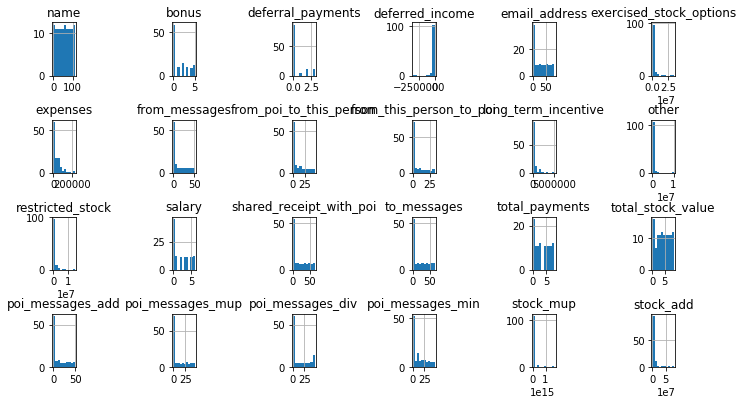

In [348]:
# 查看所有特徵值直條圖的數值
plt.figure(num="histogram", figsize=(10,8))
for feature, num in zip(train_X.columns, range(1,len(train_X.columns))):
    plt.tight_layout()
    plt.subplot(1+(len(train_X.columns))**0.5, 1+(len(train_X.columns))**0.5, num)
    plt.title(feature)
    train_X[feature].hist()
plt.show()

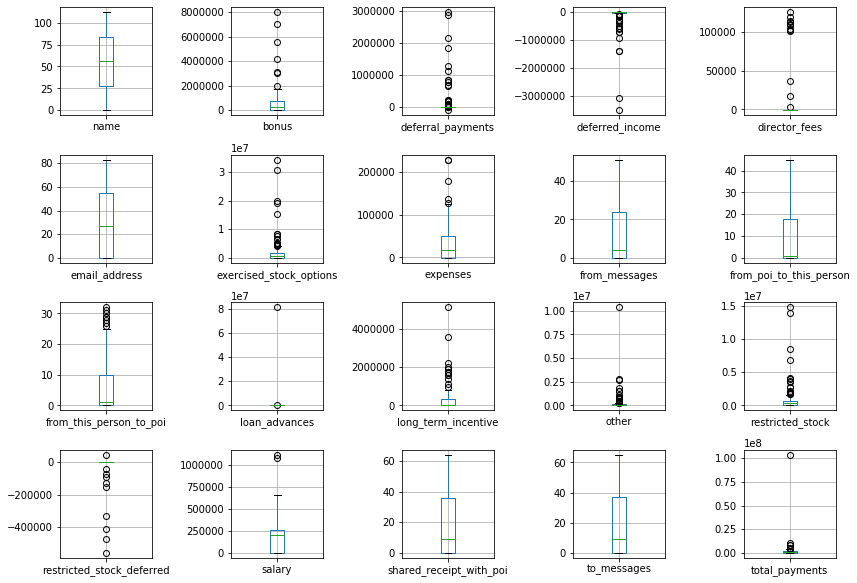

In [776]:
# 查看所有特徵值boxchart的數值
plt.figure(num="boxchart", figsize=(12,10))
for feature, num in zip(train_X.columns, range(1,len(train_X.columns))):
    plt.tight_layout()
    plt.subplot(1+(len(train_X.columns))**0.5, 1+(len(train_X.columns))**0.5, num)
    train_X.boxplot(feature)
plt.show()

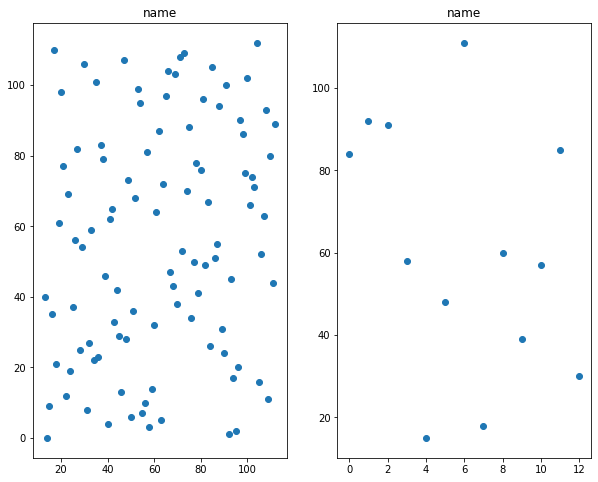

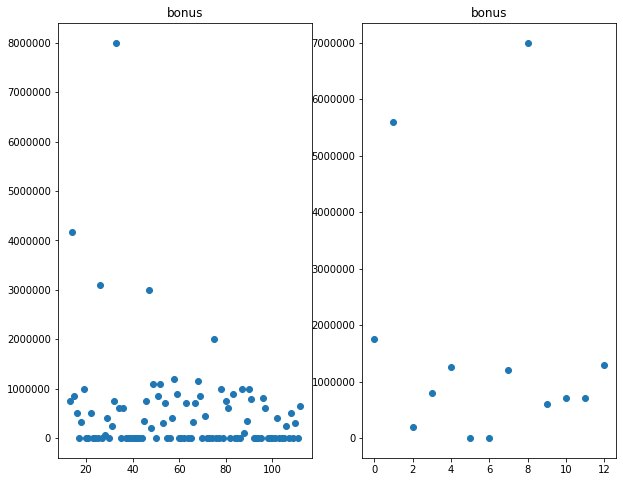

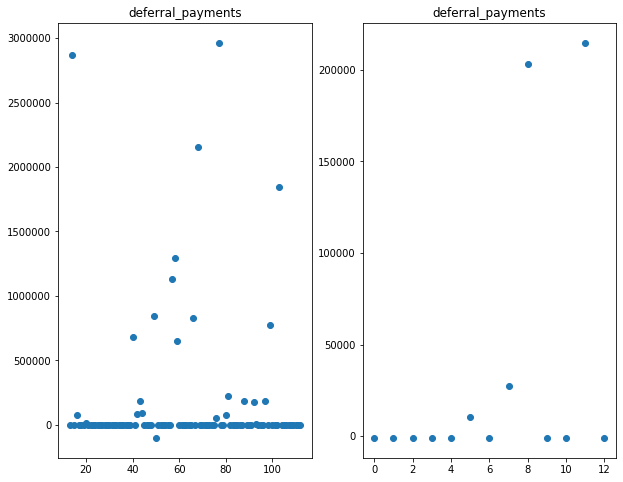

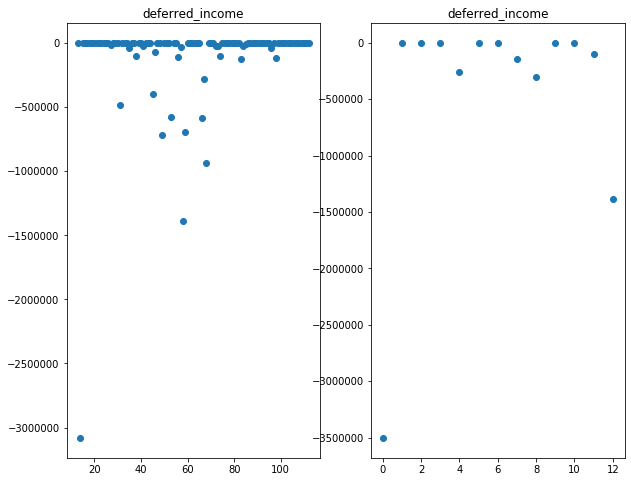

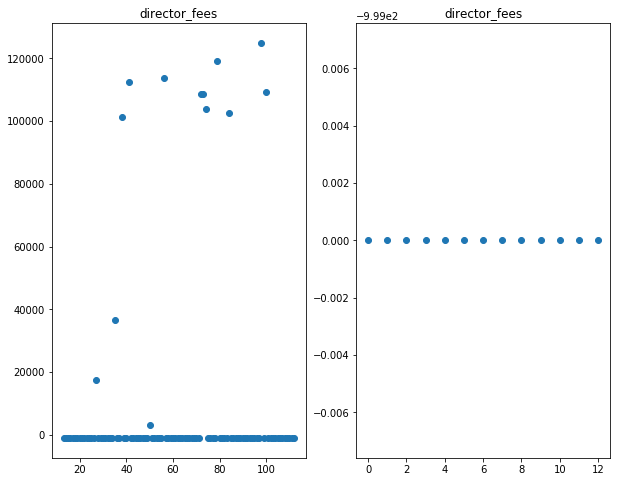

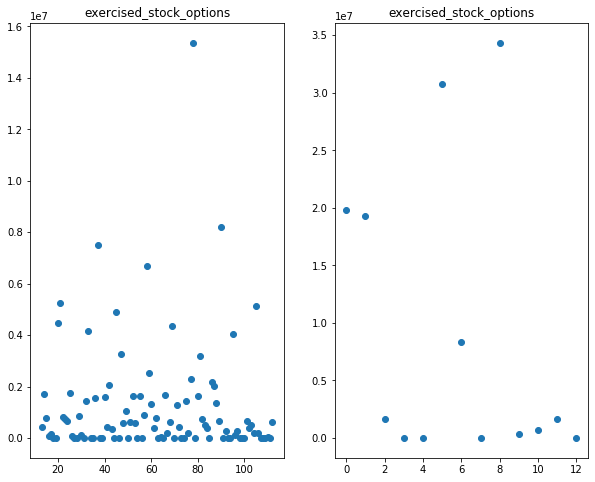

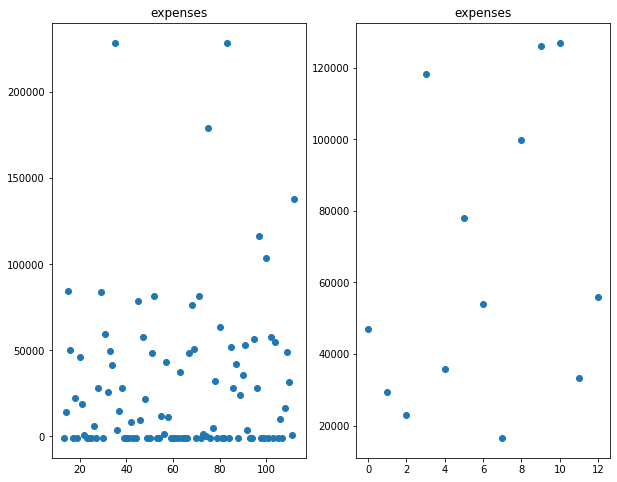

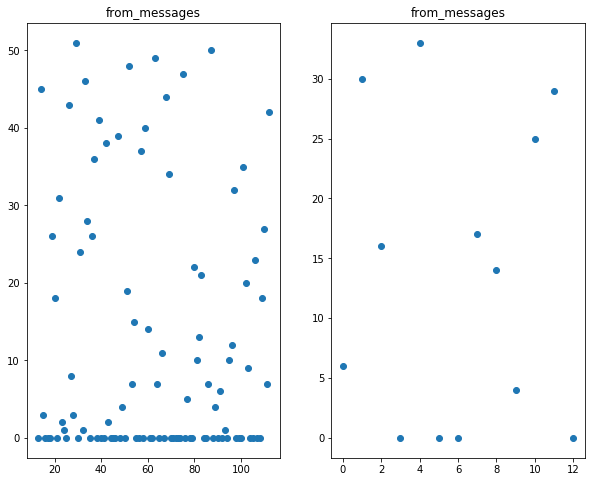

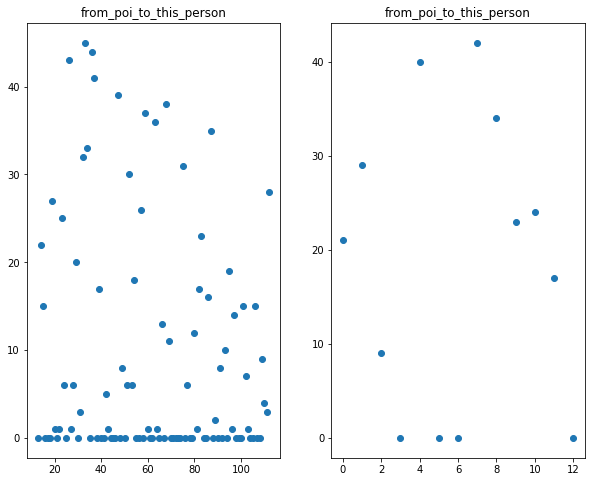

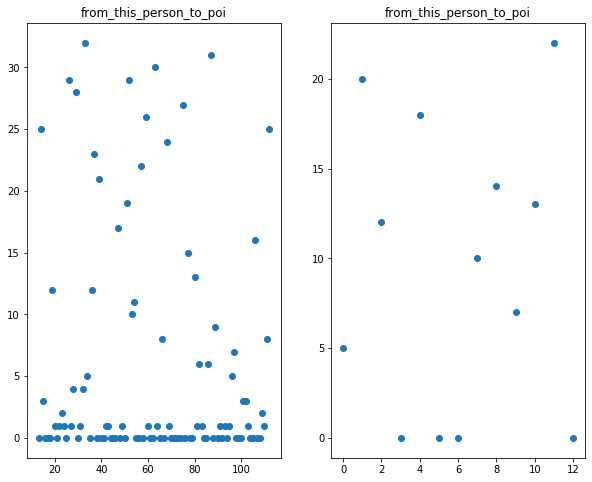

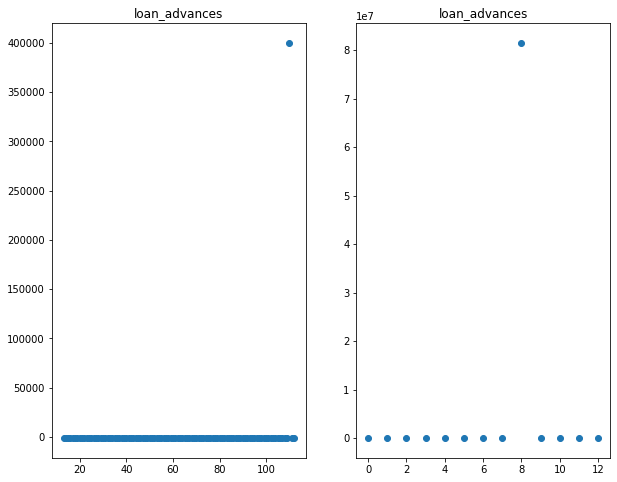

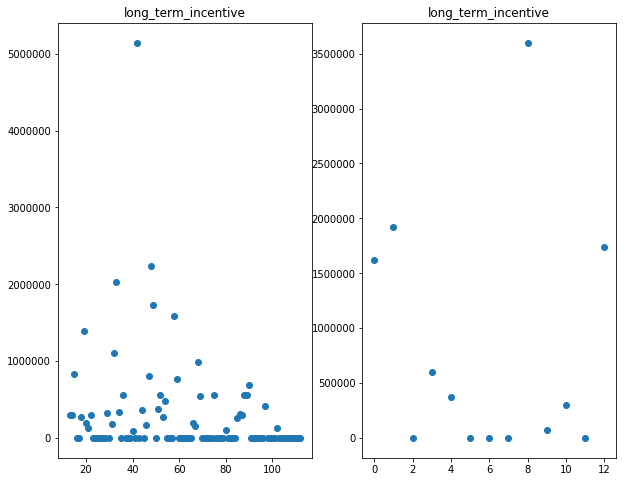

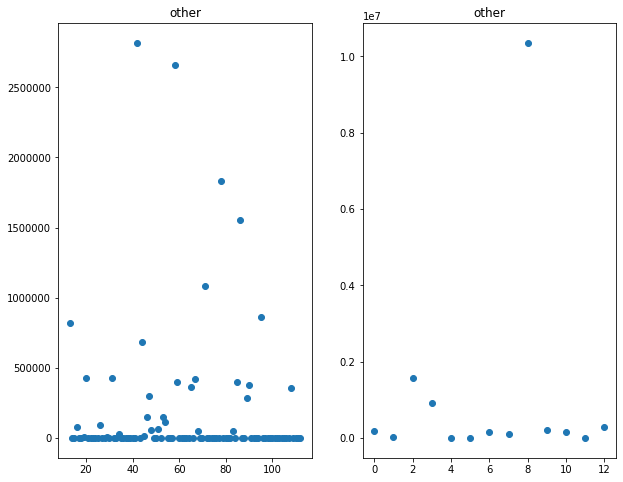

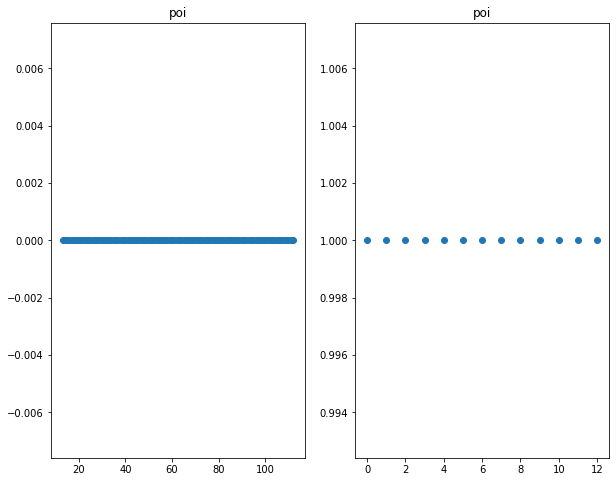

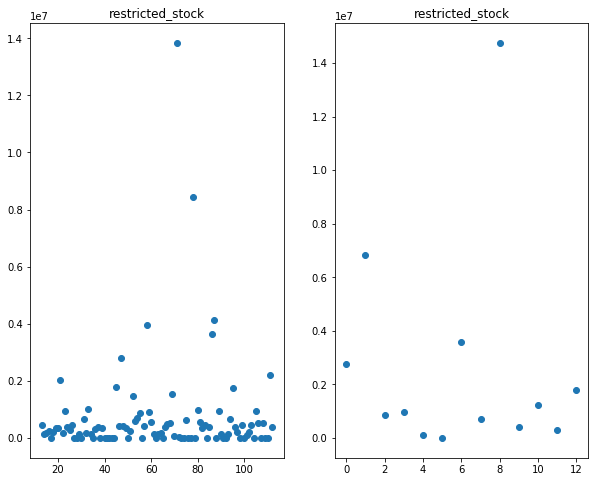

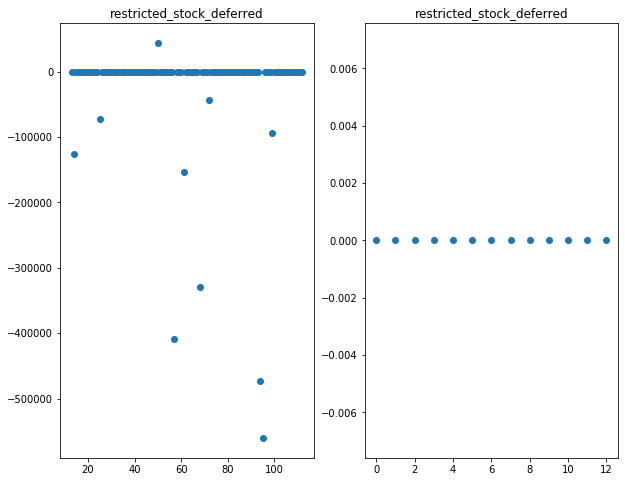

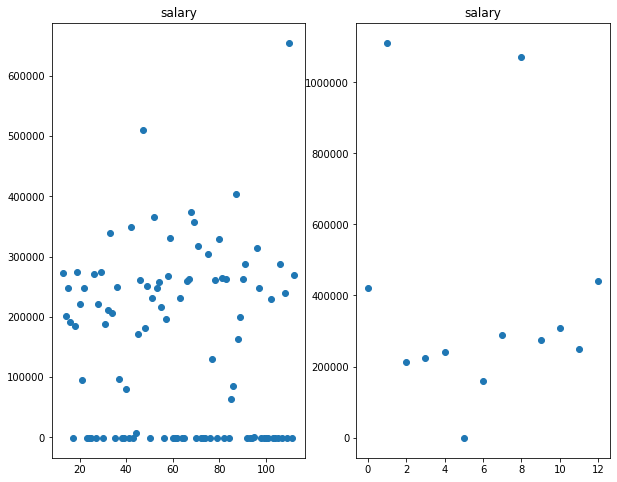

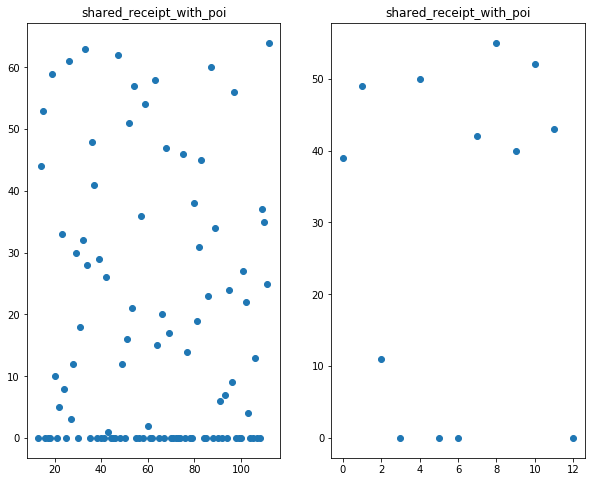

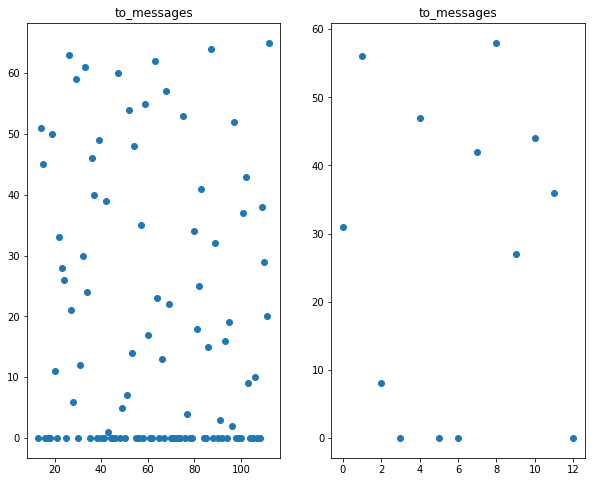

In [777]:
# 分別查看non-poi and poi的特徵值的散佈圖, 可以左右對照
for feature_sus, feature_cri, num in zip(suspects.columns, criminal.columns, range(1,len(train_X.columns))):
    if feature_sus != "email_address" and feature_cri != "email_address":
        plt.figure(num=feature_sus, figsize=(10,8))
        plt.tight_layout()
        plt.subplot(1, 2, 1)
        plt.title(feature_sus)
        plt.scatter(suspects.index, suspects[feature_sus])

        plt.subplot(1, 2, 2)
        plt.title(feature_cri)
        plt.scatter(criminal.index, criminal[feature_cri])
        plt.show()

In [449]:
# train_test_split, 順便確認分別佔有多少的true and false
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.1, random_state=4)
print(y_train)
print(y_test)

74     False
47     False
91     False
109    False
10      True
       ...  
104    False
1       True
69     False
55     False
46     False
Name: poi, Length: 101, dtype: bool
13     False
2       True
25     False
16     False
19     False
34     False
5       True
24     False
107    False
20     False
60     False
77     False
Name: poi, dtype: bool


In [478]:
# 查看各個特徵值得重要性,可以根據這些重要性進行參數調整
estimator = RandomForestClassifier()
estimator.fit(train_X, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=train_X.columns)
feats = feats.sort_values(ascending=False)
feats

/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


stock_mup                  0.164246
exercised_stock_options    0.146362
money from message         0.088398
other                      0.076501
money                      0.074831
long_term_incentive        0.057735
shared_receipt_with_poi    0.057575
poi_messages_min           0.038049
total_stock_value          0.033238
email_address              0.030811
to_messages                0.029391
from_poi_to_this_person    0.027015
from_messages              0.026336
bonus                      0.024407
poi_messages_mup           0.018917
expenses                   0.017163
deferral_payments          0.014917
salary                     0.012385
weight_poi_message         0.011780
name                       0.009792
total_payments             0.008933
from_this_person_to_poi    0.007224
deferred_income            0.006978
poi_messages_add           0.006371
restricted_stock           0.005982
stock_add                  0.004662
poi_messages_div           0.000000
dtype: float64

In [479]:
#做羅吉斯迴歸
estimator = LogisticRegression(C = 0.0001)
cross_val_score(estimator, x_train, y_train, cv=5).mean()

/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.2576190476190476

In [480]:
# 將訓練資料丟進去模型訓練
estimator.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = estimator.predict(x_test)


/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [481]:
# 將測試集丟入羅吉斯回歸
log_reg_pred = estimator.predict_proba(df_test)[:, 1]

In [482]:
# 輸出羅吉斯回歸的預測值
print(log_reg_pred)

[0.50039087 0.5        0.51306493 0.50305732 0.5        0.5
 0.55609072 0.5        0.50030569 0.50648524 0.51395687 0.50026706
 0.50096511 0.5        0.52876798 0.5        0.5015183  0.5
 0.5        0.50035831 1.         0.50080971 0.5        0.5
 0.5        0.5        0.51485867 0.50039195 0.50099782 0.50212055
 0.50181681 0.50288419 0.50067784]


In [483]:
#Logistic accuracy_score
print(accuracy_score(y_test, y_pred))

0.25


In [484]:
# creat random forest classifier
estimator = RandomForestClassifier(n_estimators=150, max_depth=7)#n_estimators=20, max_depth=4
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

In [485]:
# output random forest classifier of test set 
RandomForest_class_pred = estimator.predict_proba(df_test)[:, 1]
print(RandomForest_class_pred)

[0.2        0.13333333 0.15333333 0.14       0.16666667 0.17333333
 0.58666667 0.         0.04666667 0.02       0.03333333 0.00666667
 0.         0.         0.23333333 0.         0.03333333 0.22
 0.12666667 0.         0.72666667 0.26666667 0.03333333 0.
 0.00666667 0.         0.04666667 0.00666667 0.02666667 0.08
 0.         0.04       0.31333333]


In [486]:
# check accuracy_score
print("AC:", accuracy_score(y_test, y_pred))

AC: 0.8333333333333334


In [487]:
# check 以RandomForest_class_pred的測試集預測結果
submit['poi'] = RandomForest_class_pred
# submit['poi'] = log_reg_pred
print(submit)
submit.head()

                    name       poi
0       BELDEN TIMOTHY N  0.200000
1     BOWEN JR RAYMOND M  0.133333
2         HANNON KEVIN P  0.153333
3       DELAINEY DAVID W  0.140000
4       CAUSEY RICHARD A  0.166667
5       HICKERSON GARY J  0.173333
6         FREVERT MARK A  0.586667
7            CHAN RONNIE  0.000000
8   DONAHUE JR JEFFREY M  0.046667
9      REYNOLDS LAWRENCE  0.020000
10      HORTON STANLEY C  0.033333
11         LEWIS RICHARD  0.006667
12    SHERRICK JEFFREY B  0.000000
13        MEYER JEROME J  0.000000
14   DERRICK JR. JAMES V  0.233333
15              PIRO JIM  0.000000
16   DETMERING TIMOTHY J  0.033333
17     KISHKILL JOSEPH G  0.220000
18        BAY FRANKLIN R  0.126667
19        PRENTICE JAMES  0.000000
20                 TOTAL  0.726667
21        FALLON JAMES B  0.266667
22            METTS MARK  0.033333
23         WODRASKA JOHN  0.000000
24   MORDAUNT KRISTINA M  0.006667
25      CARTER REBECCA C  0.000000
26      BHATNAGAR SANJAY  0.046667
27      WALTERS GARE

,name,poi
0,BELDEN TIMOTHY N,0.200000
1,BOWEN JR RAYMOND M,0.133333
2,HANNON KEVIN P,0.153333
3,DELAINEY DAVID W,0.140000
4,CAUSEY RICHARD A,0.166667


In [460]:
# 存檔CVS
submit.to_csv("Day_050_12.csv", index=False)